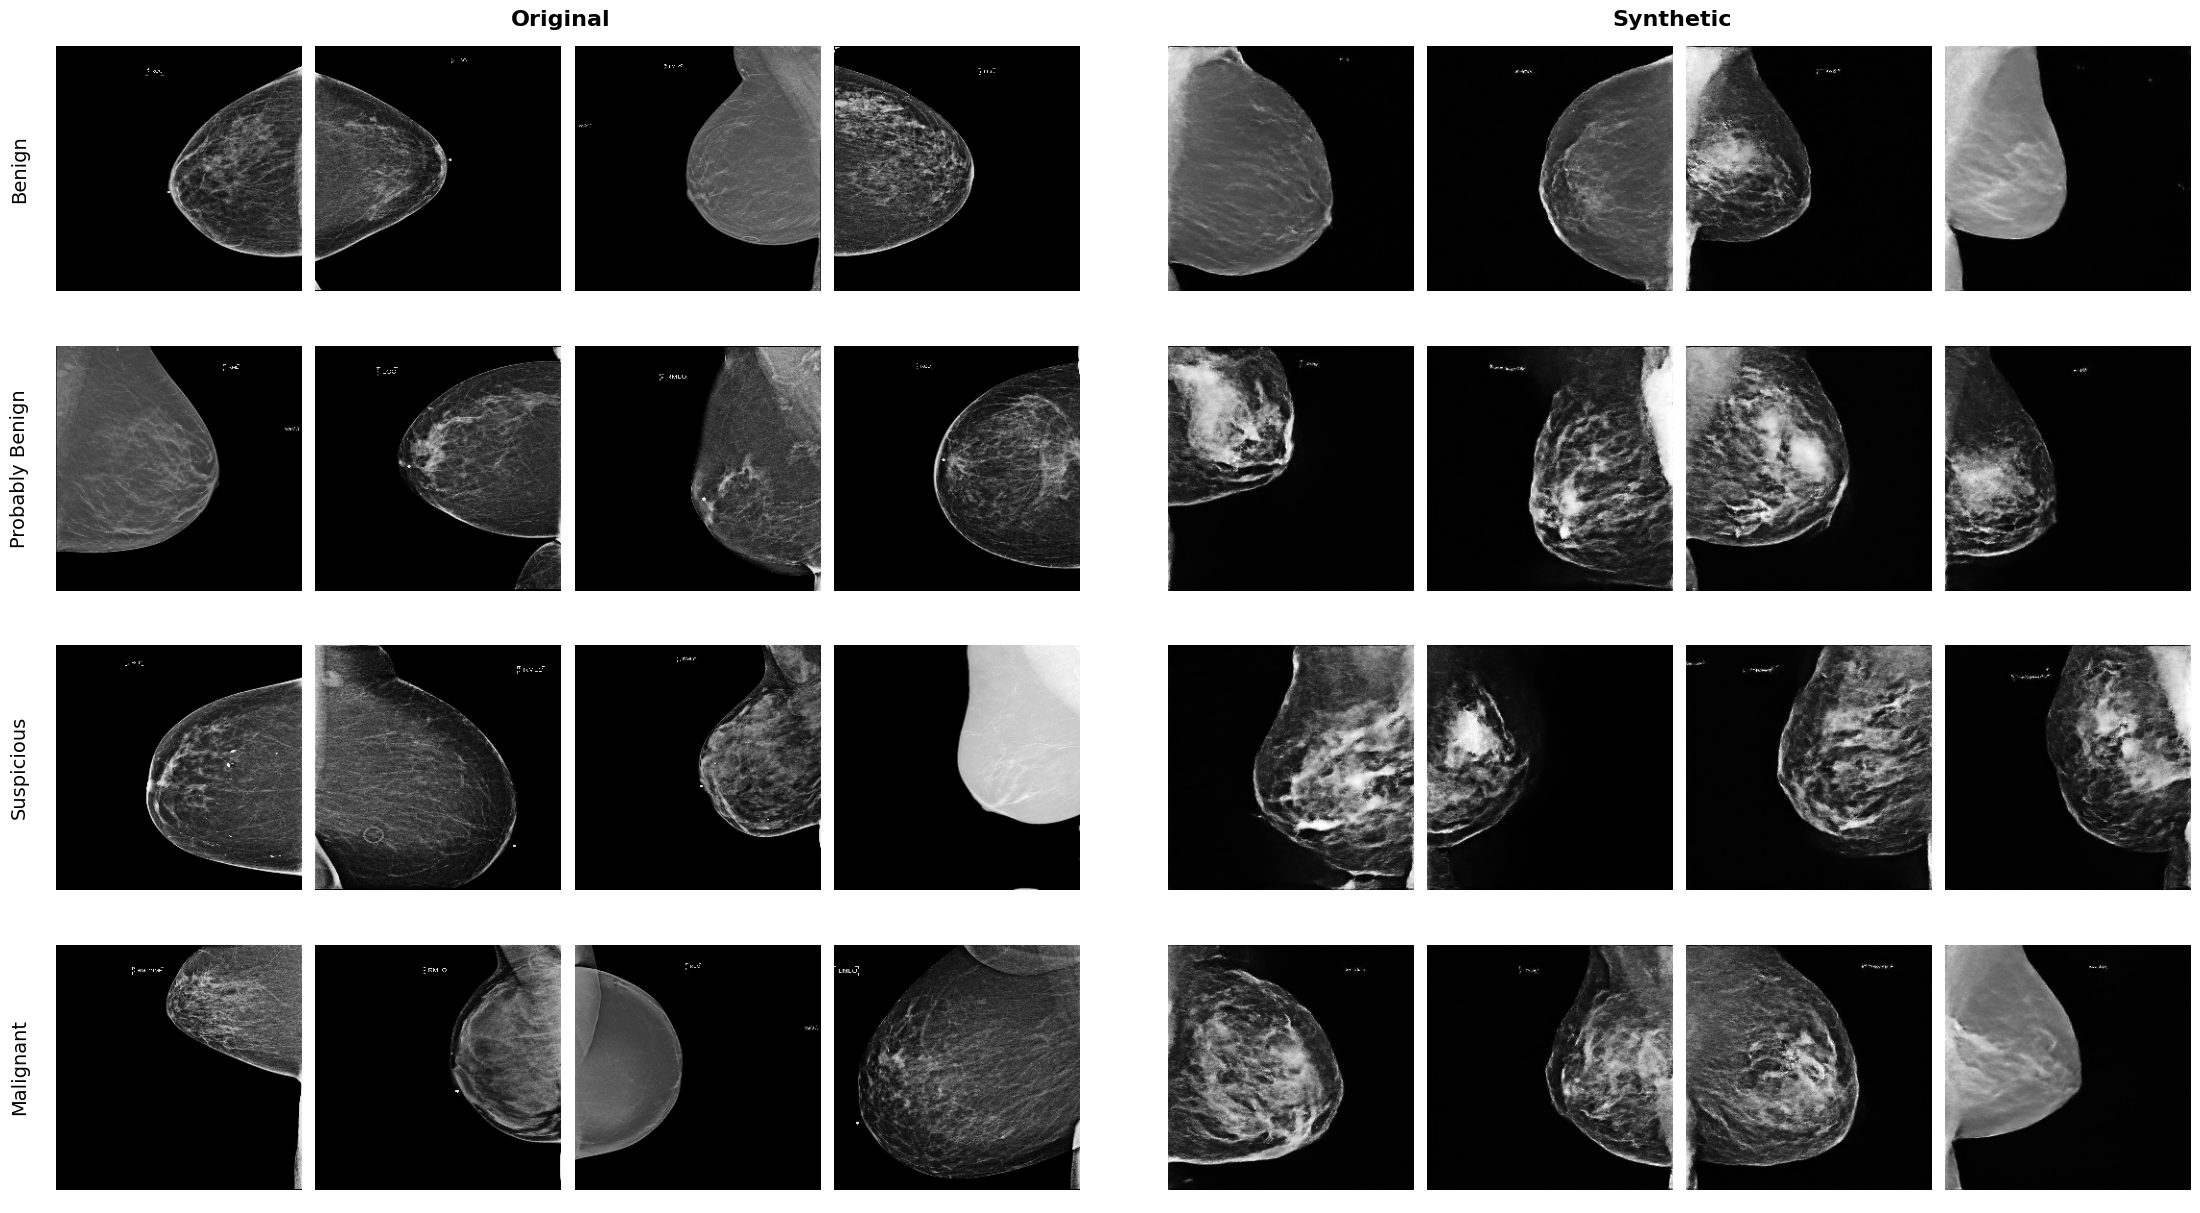

In [14]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Define paths
root = '/mnt/d/Datasets/EMBED/EMBED_clean_256x256/train'
classes = ['benign', 'probably_benign', 'suspicious', 'malignant']
orig_path = os.path.join(root, 'original')
synth_path = os.path.join(root, 'synthetic_guide5.0')

# Helper function to load first N images from sorted folder list
def load_first_images(base_dir, class_name, n=4):
    class_dir = os.path.join(base_dir, class_name)
    case_dirs = sorted(os.listdir(class_dir))[:n]
    imgs = []
    for case in case_dirs:
        nii_path = os.path.join(class_dir, case, 'slice.nii.gz')
        img = nib.load(nii_path).get_fdata()
        img = np.squeeze(img)  # remove singleton dimensions if any
        imgs.append(img)
    return imgs

# Define custom column widths (narrower spacer at index 4)
widths = [1, 1, 1, 1, 0.25, 1, 1, 1, 1]

fig, axs = plt.subplots(
    4, 9,
    figsize=(22, 12),
    gridspec_kw={'width_ratios': widths}
)

for row_idx, label in enumerate(classes):
    orig_imgs = load_first_images(orig_path, label)
    synth_imgs = load_first_images(synth_path, label)

    for i in range(4):
        axs[row_idx, i].imshow(orig_imgs[i], cmap='gray')
        axs[row_idx, i].axis('off')

    axs[row_idx, 4].axis('off')  # spacer

    for i in range(4):
        axs[row_idx, i + 5].imshow(synth_imgs[i], cmap='gray')
        axs[row_idx, i + 5].axis('off')

    # Add row label on the left (rotated, closer)
    axs[row_idx, 0].annotate(
        label.replace('_', ' ').title(),
        xy=(-0.15, 0.5),
        xycoords='axes fraction',
        rotation=90,
        ha='center',
        va='center',
        fontsize=14
    )

# Add accurately centered column titles
total_width = sum(widths)

# Compute center positions for "Original" and "Synthetic" column blocks
def block_center(start_idx, end_idx, widths):
    left = sum(widths[:start_idx])
    width = sum(widths[start_idx:end_idx + 1])
    return (left + width / 2) / total_width

original_x = block_center(0, 3, widths) + 0.01  # slight nudge to the right
synthetic_x = block_center(5, 8, widths)

fig.text(original_x, 0.99, 'Original', ha='center', va='bottom', fontsize=16, weight='bold')
fig.text(synthetic_x, 0.99, 'Synthetic', ha='center', va='bottom', fontsize=16, weight='bold')

plt.tight_layout(w_pad=1.0, h_pad=2.0)
plt.savefig("image_grid.png", dpi=300, bbox_inches='tight')
plt.show()
